# Лабораторная работа по ММод № 1 Андреюк Д.С.
Смоделируем двумерную случайную величину. Для этого необходимо иметь матрицу распределения. Сформируем её на основе программно сгенерированных выборок. Пусть (X, Y) -- двумерная случайная величина, которую мы будем моделировать, при этом обе компоненты распределены по биномиальному закону с параметрами *n=3400*, *p=0.2* и *n=4200*, *p=0.7*. Тогда построим выборки x и y мощностью 100000 для обоих величин соответственно, на основе которых построим эмпирические ряды распределения. Поскольку мы считаем, что компоненты нашей двумерной СВ независимы, то P((X, Y) = (x, y)) = P(X = x) * P(Y = y). Это позволяет нам получить эмпирическую матрицу распределения (X, Y), которая и послужит входными данными для моделирования этой самой величины.


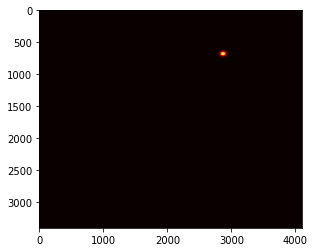

Total sum of probability matrix elements equals 0.9999999999999996


In [ ]:
import random
import numpy as np
from scipy import stats
import scipy as sp
import matplotlib.pyplot as plt
from math import log, sqrt, cos

def get_counts_from_sample(sample, n):
  counts = np.array([0.0] * (n))
  for i in sample:
    counts[int(i)] += 1
  return counts
  
def gen_prob_matrix(n1, n2, p1, p2, N):
    matrix = np.zeros((n1, n2))
    x = get_counts_from_sample(np.random.binomial(n1-1, p1, N), n1)
    x /= sum(x)
    y = get_counts_from_sample(np.random.binomial(n2-1, p2, N), n2)
    y /= sum(y)
    for i in range(n):
      for j in range(m):
        matrix[i][j] = x[i] * y[j]
    return matrix

def gen_prob_matrix_spon(n1, n2):
    matrix = np.zeros((n1, n2))
    for i in range(n):
      for j in range(m):
        matrix[i][j] = cos(log(np.random.uniform(0, 1))) ** 2
    return matrix / sum(sum(martix))


n, m = 3400, 4100
P = gen_prob_matrix(n, m, 0.2, 0.7, 100000)

q = np.array([sum(P[i]) for i in range(n)])
q = q / sum(q)
l = [0.0] + [sum(q[0: (i + 1)]) for i in range(n)]
r = np.array([sum(P[:, i]) for i in range(m)])
r = r / sum(r)
s = [0.0] + [sum(r[0: (i + 1)]) for i in range(m)]

N = 1000
sample = np.array([(0.0, 0.0)] * N)
for _ in range(N):
    x = 1 - np.random.uniform(0, 1)
    y = 1 - np.random.uniform(0, 1)
    for i in range(n):
        if l[i] < x <= l[i + 1]:
            for j in range(m):
                if s[j] < y <= s[j + 1]:
                    sample[_] = (i + 1, j + 1)
                    break
            break

X_sample = np.array([sample[i][0] for i in range(N)])
Y_sample = np.array([sample[i][1] for i in range(N)])


plt.imshow(P, cmap='hot', interpolation='nearest')
plt.show()

print(f'Total sum of probability matrix elements equals {sum(sum(P))}')

Как можно заметить, сумма всех вероятностей равна единицей с поправкой на специфику работы NumPy, так что матрица корректа. Далее мы сгенерировали выборку изучаемой двумерной величины объёмом 1000, после чего для дальнейшего изучения отделили её компоненты. 

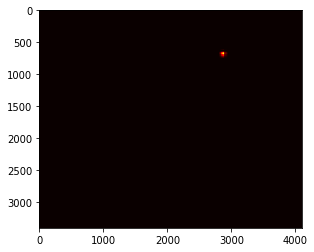

In [ ]:
def gen_prob_matrix(sample1, sample2, n, m, N):
    matrix = np.zeros((n, m))
    for i in range(len(sample1)):
      for j in range(len(sample2)):
        matrix[int(sample1[i])][int(sample2[j])] += 1
    return matrix / sum(sum(matrix))

P_emp = gen_prob_matrix(X_sample, Y_sample, n, m, N)
plt.imshow(P_emp, cmap='hot', interpolation='nearest')
plt.show()

Так выглядит тепловая карта эмпирической матрицы распределения нашей случайной величины.

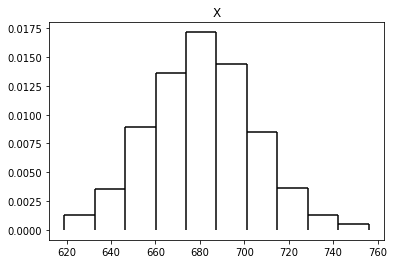

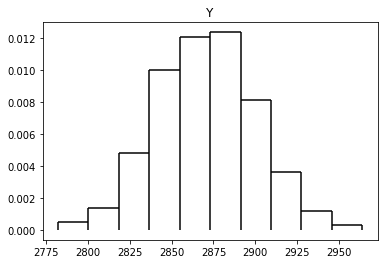

In [ ]:
def construct_interval_equal_histogram(sample, n):
    if n <= 100:
        M = int(sqrt(n))
    else:
        M = int(1 + log(n, 2))
    var_series = np.sort(sample)
    h = (var_series[n - 1] - var_series[0]) / M
    A = np.zeros(M)
    B = np.zeros(M)
    m = np.zeros(M)
    v = np.zeros(M)
    for i in range(M):
        A[i] = var_series[0] + i * h
        B[i] = var_series[0] + (i + 1) * h
        m[i] += np.count_nonzero((var_series > var_series[0] + i * h) * (var_series < var_series[0] + (i + 1) * h))
        m[i] += 0.25 * np.count_nonzero((var_series == var_series[0] + i * h))
    v = np.array(m)
    m = m / (n * h)
    vert_lines = np.zeros(len(A) + 1)
    vert_lines[0] = m[0]
    vert_lines[-1] = m[-1]
    for i in range(1, len(A)):
        vert_lines[i] = max(m[i - 1], m[i])
    plt.hlines(m, A, B)
    plt.vlines(np.append(A[0], B), np.zeros(len(A) + 1), vert_lines)
    return (A, B, v, M)

construct_interval_equal_histogram(X_sample, N)
plt.title('X')
plt.show()

plt.title('Y')
construct_interval_equal_histogram(Y_sample, N)
plt.show()

Построены равноинтервальные гистограммы.

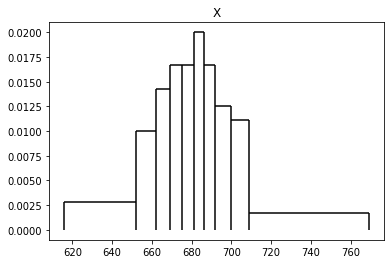

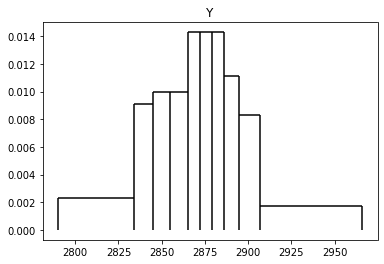

In [ ]:
def calculate_probability_equal_histogram(sample, n):
    if n <= 100:
        M = int(sqrt(n))
    else:
        M = int(1 + log(n, 2))
    sample = np.sort(sample)
    A = np.zeros(M)
    B = np.zeros(M)
    m = np.ones(M) * (n // M)
    v = np.array(m)
    A[0] = sample[0]
    B[-1] = sample[-1]
    for i in range(1, M):
        A[i] = (sample[(n // M) * i] + sample[(n // M) * i + 1]) / 2.0
        B[i - 1] = A[i]
    m = np.array([m[i] / (n * (B[i] - A[i])) for i in range(M)])
    return (A, B, v, m, M)

def construct_probability_equal_histogram(histo_tuple):
    (A, B, v, m, M) = histo_tuple
    vert_lines = np.zeros(len(A) + 1)
    vert_lines[0] = m[0]
    vert_lines[-1] = m[-1]
    for i in range(1, len(A)):
        vert_lines[i] = max(m[i - 1], m[i])
    plt.hlines(m, A, B)
    plt.vlines(np.append(A[0], B), np.zeros(len(A) + 1), vert_lines)

construct_probability_equal_histogram(calculate_probability_equal_histogram(X_sample, N))
plt.title('X')
plt.show()

construct_probability_equal_histogram(calculate_probability_equal_histogram(Y_sample, N))
plt.title('Y')
plt.show()

Построены равновероятностные гистограммы.

In [ ]:
# for natural numbers
def get_interval_prob(a, b, p):
    result = 0.0
    for i in range(len(p)):
      if a <= i + 1 < b:
        result += p[i]
    return result

def Pearson_criteria(probs, sample, n):
    (A, B, v, m, M) = calculate_probability_equal_histogram(sample, n)
    chi = 0
    for i in range(M):
        p_i = get_interval_prob(A[i], B[i] + 1, probs)
        chi += ((v[i] - n * p_i) ** 2) / p_i
    chi /= n
    k = M - 1
    return (chi, k)

print('Pearson criteria for X')
print(Pearson_criteria([sum(P[i]) for i in range(n)], X_sample, N))
print()
print('Pearson criteria for Y')
print(Pearson_criteria([sum(P[:, i]) for i in range(m)], Y_sample, N))

Pearson criteria for X
(16.57948148828928, 9)

Pearson criteria for Y
(16.801736791597666, 9)


Критическое значение критерия хи-квадрат для числа степеней свободы *k=9* при уровне значимости *alpha=0.01* равняется *chi=21.7*. Для обоих компонент изучаемой двумерной величины полученное значение меньше табличного, то есть мы не имеем оснований для опровержения нулевой гипотезы о биномиальном распределении компонент исследуемой двумерной величины с параметрами, указанными выше.

In [ ]:
def point_estimate_mean(sample):
    return sum(sample) / len(sample)
def point_estimate_variance(sample):
    mean = point_estimate_mean(sample)
    result = 0.0
    for element in sample:
        result += (element - mean) ** 2
    return result / (len(sample) - 1)
def confidence_interval_mean(sample, significance_level):
    n = len(sample)
    standart_deviation = sqrt(point_estimate_variance(sample))
    u_coefficient = stats.norm.ppf(1 - significance_level / 2)
    epsilon = standart_deviation * u_coefficient / sqrt(n)
    return (-epsilon, epsilon)

def confidence_interval_variance(sample, significance_level):
    left_chi_coefficient = stats.chi2.ppf(1 - significance_level / 2, n - 1)
    right_chi_coefficient = stats.chi2.ppf(significance_level / 2, n - 1)
    est_variance = point_estimate_variance(sample)
    standart_deviation = sqrt(est_variance)
    epsilon = (n - 1) * est_variance
    return (epsilon / left_chi_coefficient, epsilon / right_chi_coefficient)

print('Для точечных оценок матожидания используем выборочное среднее:')
M_X = point_estimate_mean(X_sample)
print(f'M[X]={M_X}')
M_Y = point_estimate_mean(Y_sample)
print(f'M[Y]={M_Y}')

print('Для точечных оценок дисперсии используем исправленную выборочную дисперсию:')
D_X = point_estimate_variance(X_sample)
print(f'D[X]={D_X}')
D_Y = point_estimate_variance(Y_sample)
print(f'D[Y]={D_Y}')

print('Доверительный интервал для матожидания при уровне значимости 0.01:')
M_X_tuple = confidence_interval_mean(X_sample, 0.01)
print(f'[{M_X + M_X_tuple[0]}; {M_X + M_X_tuple[1]}]')
M_Y_tuple = confidence_interval_mean(Y_sample, 0.01)
print(f'[{M_Y + M_Y_tuple[0]}; {M_Y + M_Y_tuple[1]}]')

print('Доверительный интервал для дисперсии при уровне значимости 0.01:')
D_X_tuple = confidence_interval_variance(X_sample, 0.01)
print(f'[{D_X + D_X_tuple[0]}; {D_X + D_X_tuple[1]}]')
D_Y_tuple = confidence_interval_variance(Y_sample, 0.01)
print(f'[{D_Y + D_Y_tuple[0]}; {D_Y + D_Y_tuple[1]}]')

Для точечных оценок матожидания используем выборочное среднее:
M[X]=681.147
M[Y]=2870.45
Для точечных оценок дисперсии используем исправленную выборочную дисперсию:
D[X]=552.0634544544542
D[Y]=868.2837837837836
Доверительный интервал для матожидания при уровне значимости 0.01:
[679.233133772306; 683.0608662276941]
[2868.049797274031; 2872.8502027259688]
Доверительный интервал для дисперсии при уровне значимости 0.01:
[1071.1215651892007; 1140.226420872282]
[1684.6568596610787; 1793.344774222698]


Теоретические характеристики первой компоненты:
M[X] = 680,
D[X] = 544

---

Теоретические характеристики второй компоненты:
M[X] = 2940,
D[X] = 868

In [ ]:
def point_estimate_covariance(sample1, sample2, n):
    mean1 = point_estimate_mean(sample1)
    mean2 = point_estimate_mean(sample2)
    cov = 0.0
    for i in range(n):
        cov += sample1[i] * sample2[i]
    return cov / n - mean1 * mean2
  
print(f'Covariance for X<-->Y is {point_estimate_covariance(X_sample, Y_sample, N)}')

Covariance for X<-->Y is 30.001850000116974


Теоретическое значение ковариации нулевое ввиду независимости величин. Вместе с тем эмпирическое пусть и не является таковым, но составляет около 4% от матожидания первой компоненты и 1% -- второй.